<a href="https://colab.research.google.com/github/mohitsharmas97/pytorch_notebooks/blob/main/pytorch_project1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#fashion mnist

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
batch_size=64
learning_rate=0.01
num_epochs=5

In [ ]:
transform=transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5),(0.5))
                              ])

In [ ]:
train_dataset=torchvision.datasets.MNIST(root='./data',train=True,download=True,transform=transform)
test_dataset=torchvision.datasets.MNIST(root='./data',train=False,download=True,transform=transform)

In [ ]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet,self).__init__()
    self.fc1=nn.Linear(28*28,128)
    self.fc2=nn.Linear(128,64)
    self.fc3=nn.Linear(64,10)

  def forward(self,x):
    x=x.view(-1,28*28)
    x=torch.relu(self.fc1(x))
    x=torch.relu(self.fc2(x))
    x=self.fc3(x)
    return x

In [ ]:
model=NeuralNet().to(device)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.001)

In [ ]:
for epoch in range(num_epochs):
  for images, labels in train_loader:
    images,labels=images.to(device),labels.to(device)
    outputs=model(images)

    loss=criterion(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Check accuracy on the test set
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the model on the 10000 test images: {100 * correct / total} %')

Epoch 1/5, Loss: 0.07406337559223175
Epoch 2/5, Loss: 0.26644280552864075
Epoch 3/5, Loss: 0.02710874006152153
Epoch 4/5, Loss: 0.06782756000757217
Epoch 5/5, Loss: 0.06826826184988022
Accuracy of the model on the 10000 test images: 97.09 %


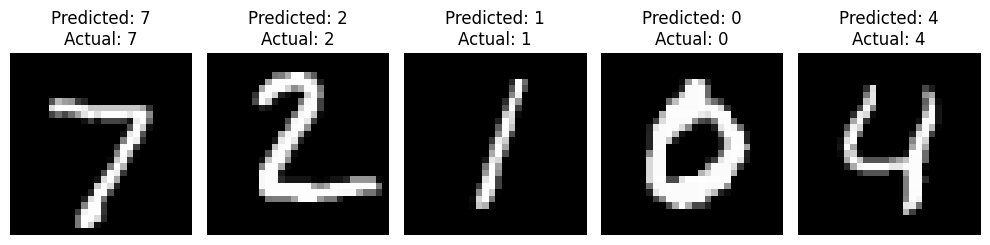

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Take 5 images and labels from the test loader
dataiter = iter(test_loader)
images, labels = next(dataiter)

# Select the first 5 images and labels
images_to_test = images[:5].to(device)
labels_to_test = labels[:5].to(device)

# Make predictions
with torch.no_grad():
    outputs = model(images_to_test)
    _, predicted = torch.max(outputs.data, 1)

# Display the images and predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for i in range(5):
    ax = axes[i]
    img = images_to_test[i].cpu().numpy().squeeze() # Move to CPU and remove channel dimension
    ax.imshow(img, cmap='gray')
    ax.set_title(f"Predicted: {predicted[i].item()}\nActual: {labels_to_test[i].item()}")
    ax.axis('off')

plt.tight_layout()
plt.show()